<a href="https://colab.research.google.com/github/arirodriguez001/Laboratory-III/blob/main/RCfiltroPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de datos
from google.colab import files
uploaded = files.upload()

# Leer el archivo con codificación 'latin-1' y mostrar las primeras líneas para verificar su contenido
file_name = list(uploaded.keys())[0]
with open(file_name, 'r', encoding='latin-1') as f:
    lines = f.readlines()

Saving TP Filtro RC multiple.txt to TP Filtro RC multiple (10).txt


Magnitud a 100 Hz: 16.7757113873116 dB
Magnitud a 1000 Hz: -0.457193707355337 dB
Atenuación por década: 17.23 dB/década


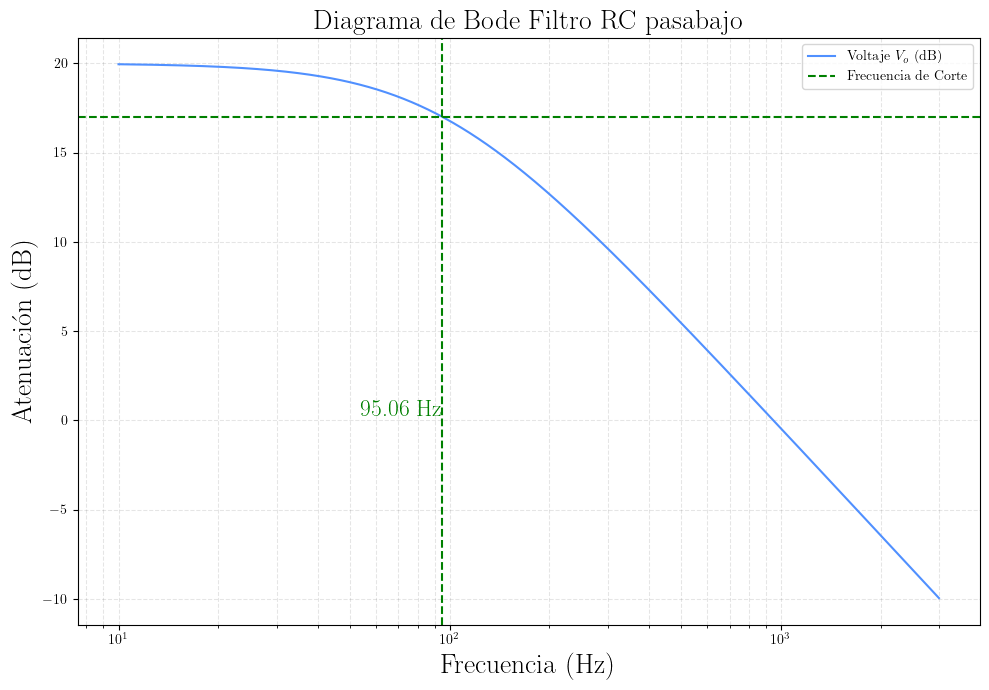

In [ ]:
# Expresión regular para extraer frecuencia y magnitud en dB
# Formato: frecuencia seguida de "(valor en dB, ángulo)"
pattern = r"([0-9\.e\+]+)\s*\(\s*([0-9\.\-e\+]+)dB"

# Listas para almacenar las frecuencias y magnitudes
frequencies = []
magnitudes = []

# Extraer los datos usando la expresión regular
for line in lines:
    match = re.search(pattern, line)
    if match:
        freq = float(match.group(1))  # Frecuencia
        mag_dB = float(match.group(2))  # Magnitud en dB
        frequencies.append(freq)
        magnitudes.append(mag_dB)

# Verificar si se extrajeron datos
if not frequencies or not magnitudes:
    print("No se encontraron datos. Verifica el formato del archivo y la expresión regular.")
else:
    # Convertir las listas en un DataFrame
    data = pd.DataFrame({'Freq': frequencies, 'dB': magnitudes})

    # Filtrar las frecuencias que están cerca de 100 Hz y 1000 Hz
    f_100Hz = data.iloc[(data['Freq'] - 100).abs().argsort()[:1]]  # Cerca de 100 Hz
    f_1000Hz = data.iloc[(data['Freq'] - 1000).abs().argsort()[:1]]  # Cerca de 1000 Hz

    # Verificar si se encontraron datos cercanos a 100 Hz y 1000 Hz
    if f_100Hz.empty or f_1000Hz.empty:
        print("No se encontraron datos cercanos a 100 Hz o 1000 Hz.")
    else:
        # Obtener los valores de magnitud en dB en estas frecuencias
        dB_100Hz = f_100Hz['dB'].values[0]
        dB_1000Hz = f_1000Hz['dB'].values[0]

        # Calcular la atenuación por década
        attenuation_per_decade = dB_100Hz - dB_1000Hz

        # Mostrar resultados
        print(f'Magnitud a 100 Hz: {dB_100Hz} dB')
        print(f'Magnitud a 1000 Hz: {dB_1000Hz} dB')
        print(f'Atenuación por década: {attenuation_per_decade:.2f} dB/década')

        # Graficar el diagrama de magnitud en dB
        plt.figure(figsize=(10,7))
        plt.plot(data['Freq'], data['dB'], label='Voltaje $V_o$ (dB)')
        plt.xscale('log')

        fc_real= 95.06047937

        plt.xlabel('Frecuencia (Hz)', fontsize=20)
        plt.axvline(x=fc_real, color='green', linestyle='--', label='Frecuencia de Corte')
        plt.text(fc_real, 0, rf'{fc_real:.2f} Hz', color='green', fontsize=17, ha='right', va='bottom')

        plt.ylabel('Atenuación (dB)', fontsize=20)
        plt.axhline(y=17, color='green', linestyle='--',)

        plt.title('Diagrama de Bode Filtro RC pasabajo', fontsize=20)
        plt.grid(True, which="both", ls="--")
        plt.legend()
        plt.show()

In [ ]:
!pip install pint
import pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np

ureg = pint.UnitRegistry()

resistencia = 1000 * ureg.ohm
capacitancia = 1.67 * ureg.microfarad

resultado = 1 / (2*np.pi*(resistencia * capacitancia))  # Added 1/ to the beginning

print(f"Resultado: {resultado.to('Hz')}")

Resultado: 95.30236113287147 hertz
